# Assignment-11-Amazon_Review_ Sentiment Analysis_Musical_Instrument_Data

TWO:
1) Extract reviews of any product from ecommerce website like amazon<br/>
2) Perform emotion mining


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [2]:
# loading dataset
review = pd.read_csv('Musical_instruments_reviews.csv')

## Data Preprocessing for Sentiment Analysis


In [3]:
review.shape

(10261, 9)

In [4]:
review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:
# Renaming columns for ease of reference
review = review.rename({'reviewerID':'review_id', 'reviewerName':'review_name', 'reviewText':'review_text', 
               'unixReviewTime':'unix_review_time', 'reviewTime':'review_time'}, axis = 1)
review.head()

,review_id,asin,review_name,helpful,review_text,overall,summary,unix_review_time,review_time
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


## Checking for NA values

In [6]:
review.isna().sum()

review_id            0
asin                 0
review_name         27
helpful              0
review_text          7
overall              0
summary              0
unix_review_time     0
review_time          0
dtype: int64

**Inference: review_text has 7 missing values**

## Missing Value Imputation

In [7]:
review['review_text'] = review['review_text'].fillna('Missing')

## Concatinating review_text and summary

In [8]:
review['reviews'] = review['review_text'] + review['summary']
review.head()

,review_id,asin,review_name,helpful,review_text,overall,summary,unix_review_time,review_time,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


## Dropping review_text and summary


In [9]:
review = review.drop(['review_text', 'summary'], axis = 1)
review.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,review_time,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [10]:
# Handling review_time column
'''Here we have an unusual review time column which has date and year, once we split both we will split the date 
further into month and date '''

# new data frame which has date and year
new = review["review_time"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
review["date"]= new[0] 
  
# making separate year column from new data frame 
review["year"]= new[1] 

review=review.drop(['review_time'], axis=1)
review.head()


,review_id,asin,review_name,helpful,overall,unix_review_time,reviews,date,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,1393545600,"Not much to write about here, but it does exac...",02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,1363392000,The product does exactly as it should and is q...,03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,1377648000,The primary job of this device is to block the...,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,1392336000,Nice windscreen protects my MXL mic and preven...,02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,1392940800,This pop filter is great. It looks and perform...,02 21,2014


In [11]:
# Splitting the date 
new1 = review["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
review["month"]= new1[0] 
  
# adding day to the main dataset 
review["day"]= new1[1] 

review=review.drop(['date'], axis=1)
review.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5,1393545600,"Not much to write about here, but it does exac...",2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5,1363392000,The product does exactly as it should and is q...,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5,1377648000,The primary job of this device is to block the...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5,1392336000,Nice windscreen protects my MXL mic and preven...,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5,1392940800,This pop filter is great. It looks and perform...,2014,02,21


## Removing unnecessary columns

In [12]:
review=review.drop(['review_name','unix_review_time'], axis=1)
#Creating a copy 
clean_reviews=review.copy()

In [13]:
import re

In [14]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [15]:
review['reviews'] = review['reviews'].apply(lambda x: review_cleaning(x))


In [16]:
review.head()


,review_id,asin,helpful,overall,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,not much to write about here but it does exact...,2014,02,28
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,the product does exactly as it should and is q...,2013,03,16
2,A195EZSQDW3E21,1384719342,"[1, 1]",5,the primary job of this device is to block the...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,nice windscreen protects my mxl mic and preven...,2014,02,14
4,A94QU4C90B1AX,1384719342,"[0, 0]",5,this pop filter is great it looks and performs...,2014,02,21


## Stopwords

In [17]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chetana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chetana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [19]:
review['reviews'] = review['reviews'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))
review.head()

,review_id,asin,helpful,overall,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,not much write but exactly supposed filters po...,2014,02,28
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,product exactly quite affordablei not realized...,2013,03,16
2,A195EZSQDW3E21,1384719342,"[1, 1]",5,primary job device block breath would otherwis...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,nice windscreen protects mxl mic prevents pops...,2014,02,14
4,A94QU4C90B1AX,1384719342,"[0, 0]",5,pop filter great looks performs like studio fi...,2014,02,21


## Calculating sentiment value for reviews


In [20]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [21]:
afinn.head()


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [22]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [23]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [24]:
# test that it works
calculate_sentiment(text = 'nice')

3

In [26]:
review['sentiment_value'] = review['reviews'].apply(calculate_sentiment)

In [27]:
review

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,not much write but exactly supposed filters po...,2014,02,28,0
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,product exactly quite affordablei not realized...,2013,03,16,2
2,A195EZSQDW3E21,1384719342,"[1, 1]",5,primary job device block breath would otherwis...,2013,08,28,-1
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,nice windscreen protects mxl mic prevents pops...,2014,02,14,4
4,A94QU4C90B1AX,1384719342,"[0, 0]",5,pop filter great looks performs like studio fi...,2014,02,21,5
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]",5,great expected thank allfive stars,2014,07,20,5
10257,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",5,ive thinking trying nanoweb strings but bit pu...,2014,07,2,26
10258,AWCJ12KBO5VII,B00JBIVXGC,"[0, 0]",4,tried coated strings past including elixirs ne...,2014,07,22,11
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"[0, 0]",4,well made elixir developed taylor guitars stri...,2014,07,1,16


In [28]:
# how many words are in the sentence?
review['word_count'] = review['reviews'].str.split().apply(len)
review['word_count']

0         25
1         55
2         48
3         22
4         21
        ... 
10256      5
10257    291
10258     58
10259    153
10260     61
Name: word_count, Length: 10261, dtype: int64

In [29]:
review.sort_values(by='sentiment_value')


,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
6758,A3FQ9WYUHG9CD,B001OLZYUU,"[0, 1]",4,fender treated polish cloth soft ecru colored ...,2013,12,4,-35,349
5678,A34WEXT7SIRFE4,B000ULAP4U,"[9, 14]",2,cans decent back bucks theyve inflated thats r...,2012,02,3,-30,105
4112,A3M9FH2OZKYF4D,B000A2HOB6,"[1, 2]",1,crikey begin firstly hated fact package two st...,2013,06,23,-27,67
8812,A165EMA3YTIM6A,B004UJO41S,"[1, 11]",1,downgrade star returning back brookmays seller...,2012,01,3,-20,410
9364,A3D1A0YHTT0E9G,B005OZE9SA,"[9, 10]",1,updated owning year encountering many difficul...,2012,10,29,-16,268
...,...,...,...,...,...,...,...,...,...,...
8500,ADH0O8UVJOT10,B0043RZ9QQ,"[2, 2]",5,unfamiliar voxs amplug products things amazing...,2012,10,24,78,501
6576,A20JJ8634DG3FS,B001I8ITQA,"[10, 10]",5,comparisons compared side side following pedal...,2013,08,21,98,1129
5973,A1LCG14GZJI5LO,B000Y7Q2C4,"[1, 1]",5,love capo let tell capo journey ive used every...,2014,05,30,105,637
8636,A35YS5ND3K5FN,B004ISK48S,"[74, 75]",5,constructionthis amp certainly looks sharp not...,2011,02,10,130,719


In [30]:
# Maximum sentiment value
review['sentiment_value'].max()

139

In [31]:
# review which is having max sentiment value
review[review['sentiment_value']==139]

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
412,A27L5L6I7OSV5B,B0002CZV82,"[142, 150]",2,greg abrams review entitled but tone snobs rev...,2011,06,30,139,713


In [32]:
# Full review at index 412
review['reviews'][412]

'greg abrams review entitled but tone snobs review down products pagealright want get good if somewhat basic distortion sound less deali strongly disagree find much better distortions less even near mark currently priced ative played guitar years like many people one first pedal purchases afterall everyone talks theyre available given music store nation hear famous musicians using plus actually pretty cheap snapped one like everyone else come find something popular doesnt always mean good see nickelback transformers movie franchise kardashian family etcso plugged didnt really care distortion harsh thin artificial sounding always noisy tried amps practic amp solid state fender frontman big amp tube halfstack not diverse basic sound not likeable ive read japanese made better sound newer made taiwan models but either way not great pedal mindbut like many newer players didnt know better time fast forward years ive bought sold literally dozens pedals whole world great tones found if keep ey

In [33]:
# minimum sentiment value
review['sentiment_value'].min()

-35

In [34]:
# review which is having min sentiment value
review[review['sentiment_value']==-35]

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
6758,A3FQ9WYUHG9CD,B001OLZYUU,"[0, 1]",4,fender treated polish cloth soft ecru colored ...,2013,12,4,-35,349


In [35]:
# Full review at index 6758
review['reviews'][6758]

'fender treated polish cloth soft ecru colored cloth cut scalloped edge around asimple product classic fender logo left upper quadrant cloth resealableplastic bag cloth came label read states size inchesby incheswell size measured actually inches inches wanted mention itbecause seen people get mighty upset things like no problem inch minor detail go lumber yard time look wontactually find actual theyve shrinking yearsi not sure cloth treated but not feel different untreatedgibson polishing cloths purchased also gave nose test thought might hintof whiff polish something nope no scent no whiffwhat find disconcerting warning product details section amazon web page isthe fourth bullet down california residents click proposition warning thewarning verbatim amazon kudos amazon posting warning californias proposition entitles california consumers special warnings products contain chemicals known state california cause cancer birth defects reproductive harm if products expose consumers chemica

In [36]:
# Sentiment score of the whole review
review['sentiment_value'].describe()

count    10261.000000
mean         6.928759
std          8.030333
min        -35.000000
25%          2.000000
50%          6.000000
75%         10.000000
max        139.000000
Name: sentiment_value, dtype: float64

In [37]:
# Sentiment score of the whole review
review[review['sentiment_value']<=0]

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,not much write but exactly supposed filters po...,2014,02,28,0,25
2,A195EZSQDW3E21,1384719342,"[1, 1]",5,primary job device block breath would otherwis...,2013,08,28,-1,48
7,AJNFQI3YR6XJ5,B00004Y2UT,"[0, 0]",3,use cable run output pedal chain input fender ...,2012,11,16,0,87
12,A2NIT6BKW11XJQ,B00005ML71,"[0, 0]",3,if not use using large sustaining pedal playin...,2013,11,17,0,16
28,A2CCGGDGZ694CT,B000068NVI,"[1, 1]",4,hosa xlr cables affordable heavily madei large...,2012,07,11,-2,29
...,...,...,...,...,...,...,...,...,...,...
10178,A768OB1LNE356,B00FXKIG5I,"[1, 2]",2,larger ones sometimes neck snap thought might ...,2014,03,22,-5,44
10181,AYTKUTAP0VA53,B00FXKIG5I,"[0, 0]",5,thing tiny not breakable swivel head original ...,2014,02,9,0,12
10188,A3M1PLEYNDEYO8,B00GTSM8FW,"[0, 0]",5,several capos but first adjustable tension sev...,2014,04,29,-5,72
10222,A2FY8306QHI5LE,B00IZCSW3M,"[0, 0]",4,twice price standard strings daddario nyxl str...,2014,06,21,0,40


In [38]:
review[review['sentiment_value']>=100]


,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count
412,A27L5L6I7OSV5B,B0002CZV82,"[142, 150]",2,greg abrams review entitled but tone snobs rev...,2011,06,30,139,713
5973,A1LCG14GZJI5LO,B000Y7Q2C4,"[1, 1]",5,love capo let tell capo journey ive used every...,2014,05,30,105,637
8636,A35YS5ND3K5FN,B004ISK48S,"[74, 75]",5,constructionthis amp certainly looks sharp not...,2011,02,10,130,719


# Visualization

C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

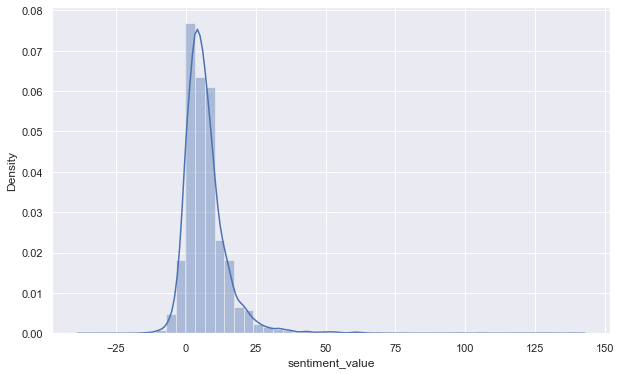

In [39]:
# Checking the distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(review['sentiment_value'])

In [40]:
review['index']=range(0,len(review))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

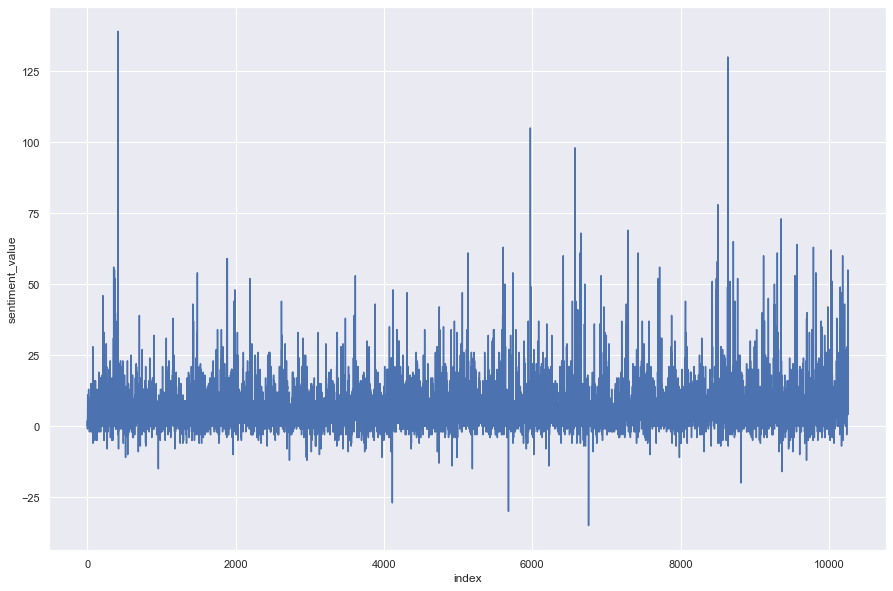

In [41]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=review)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

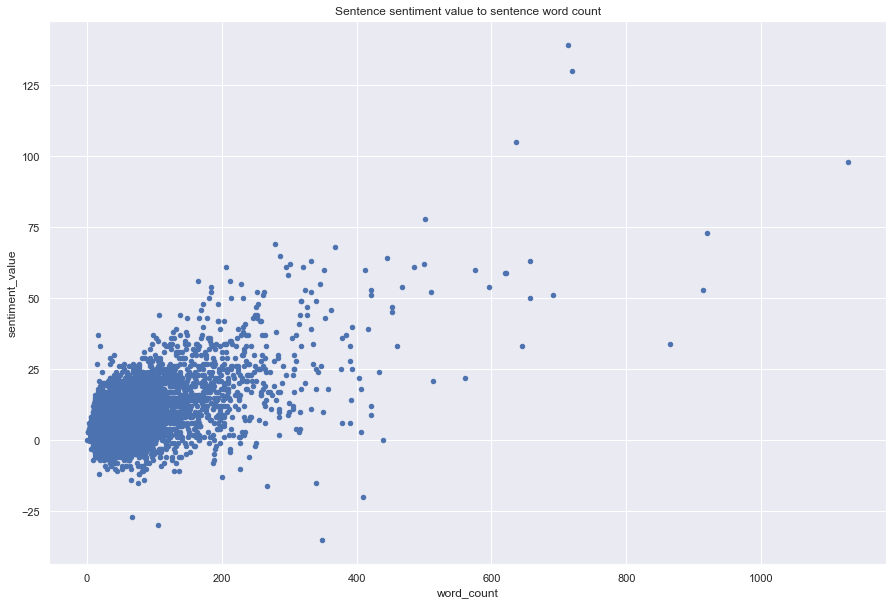

In [42]:
review.plot.scatter(x='word_count', y='sentiment_value', figsize=(15,10), title='Sentence sentiment value to sentence word count')


In [43]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment_value'] < 0:
        val = 'Negative'
    elif row['sentiment_value'] == 0: 
        val = 'Neutral'
    elif row['sentiment_value'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [44]:
#Applying the function in our new column
review['sentiment_category'] = review.apply(sentiment_cat, axis=1)
review.head()

,review_id,asin,helpful,overall,reviews,year,month,day,sentiment_value,word_count,index,sentiment_category
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,not much write but exactly supposed filters po...,2014,02,28,0,25,0,Neutral
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,product exactly quite affordablei not realized...,2013,03,16,2,55,1,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",5,primary job device block breath would otherwis...,2013,08,28,-1,48,2,Negative
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,nice windscreen protects mxl mic prevents pops...,2014,02,14,4,22,3,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",5,pop filter great looks performs like studio fi...,2014,02,21,5,21,4,Positive


In [45]:
review['sentiment_category'].value_counts()


Positive    8756
Negative     860
Neutral      645
Name: sentiment_category, dtype: int64

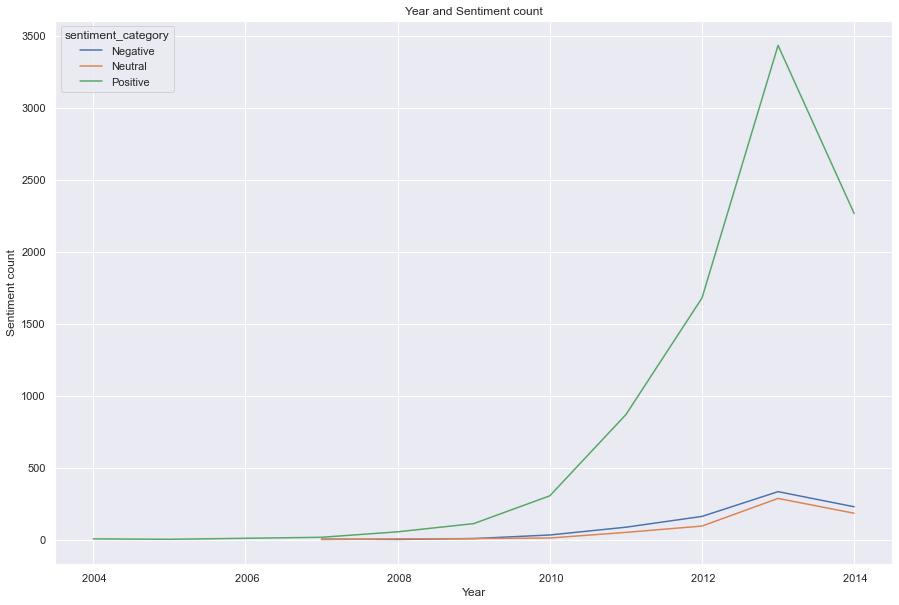

In [46]:
# Year vs Sentiment count
review.groupby(['year','sentiment_category'])['sentiment_category'].count().unstack().plot(figsize = (15,10),legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

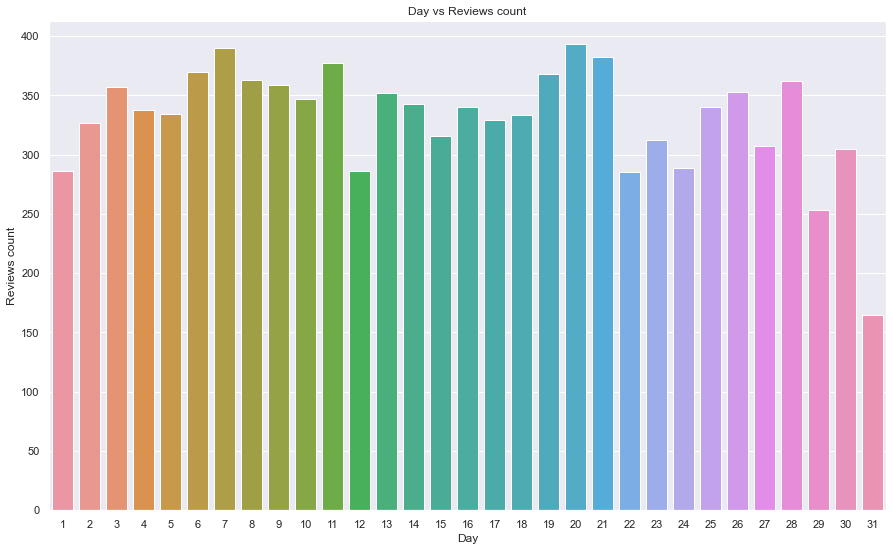

In [47]:
# Day of month vs Reviews count

#Creating a dataframe
day=pd.DataFrame(review.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.set(rc={'figure.figsize':(15, 9)})
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

## Calculate percentage for each sentiment category

In [48]:
def count_values_in_column(review,feature):
 total=review.loc[:,feature].value_counts(dropna=False)
 percentage=round(review.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(review,'sentiment_category')

,Total,Percentage
Positive,8756,85.33
Negative,860,8.38
Neutral,645,6.29


In [49]:
y = count_values_in_column(review, 'sentiment_category')
y['Percentage']

Positive    85.33
Negative     8.38
Neutral      6.29
Name: Percentage, dtype: float64

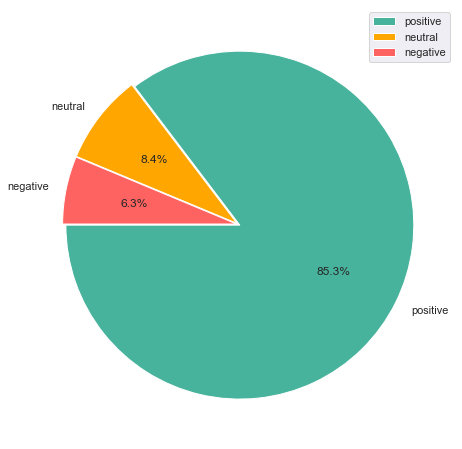

In [50]:
import matplotlib.pyplot as plt
y=count_values_in_column(review, 'sentiment_category')
y=y['Total']
plt.figure(figsize=(8,8))
mylabels = ['positive', 'neutral','negative']

plt.pie(y, labels = mylabels, startangle=180, colors=['#47B39C', '#ffa600','#ff6361'], autopct='%1.1f%%', explode=[0.01,0.01,0.01])
plt.legend()
plt.show()

# Inference:


## From the above visualization it is very clear that the number of positive reviews for the musical instrument on Amazon are high. 